In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df= pd.read_csv(r"/home/anle/Analysis_CO2_Emission_Prj/eda_output_an/filled_dataset.csv")

In [5]:
df.head()

,country,iso_code,year,ft_co2,ft_industr_on_gdp,ft_deforest_area_ha,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_renewable_energy,ft_forest_area_ha,ft_deforest_ratio,ft_gdp,ft_population,ft_hdi,ft_forest_area_percent
0,Afghanistan,AFG,2001.0,1.069,39.823426,88.092712,20.008285,18.643907,65286400.0,45.6,1208440.0,0.000073,2.813572e+09,20284307.0,0.355,1.852782
1,Afghanistan,AFG,2002.0,1.341,23.810127,178.947855,17.595130,21.698903,65286400.0,37.8,1208440.0,0.000148,3.825701e+09,21378117.0,0.383,1.852782
2,Afghanistan,AFG,2003.0,1.560,22.710864,244.336255,16.271540,17.525504,65286400.0,36.7,1208440.0,0.000202,4.520947e+09,22733049.0,0.392,1.852782
3,Afghanistan,AFG,2004.0,1.237,26.226790,201.322404,18.795908,21.843008,65286400.0,44.2,1208440.0,0.000167,5.224897e+09,23560654.0,0.408,1.852782
4,Afghanistan,AFG,2005.0,1.890,26.812099,236.021558,12.682471,13.073844,65286400.0,33.9,1208440.0,0.000195,6.203257e+09,24404567.0,0.417,1.852782


In [6]:
Y = df['ft_co2']
independent_vars = [col for col in df.columns if col.startswith('ft_') and col != 'ft_co2']
X = df[independent_vars]
X_with_const = sm.add_constant(X)

In [7]:
X_with_const

,const,ft_industr_on_gdp,ft_deforest_area_ha,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_renewable_energy,ft_forest_area_ha,ft_deforest_ratio,ft_gdp,ft_population,ft_hdi,ft_forest_area_percent
0,1.0,39.823426,88.092712,20.008285,18.643907,65286400.0,45.6,1208440.0,0.000073,2.813572e+09,20284307.0,0.355,1.852782
1,1.0,23.810127,178.947855,17.595130,21.698903,65286400.0,37.8,1208440.0,0.000148,3.825701e+09,21378117.0,0.383,1.852782
2,1.0,22.710864,244.336255,16.271540,17.525504,65286400.0,36.7,1208440.0,0.000202,4.520947e+09,22733049.0,0.392,1.852782
3,1.0,26.226790,201.322404,18.795908,21.843008,65286400.0,44.2,1208440.0,0.000167,5.224897e+09,23560654.0,0.408,1.852782
4,1.0,26.812099,236.021558,12.682471,13.073844,65286400.0,33.9,1208440.0,0.000195,6.203257e+09,24404567.0,0.417,1.852782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,1.0,32.015584,25913.690270,7.578984,19.691229,39075700.0,82.0,17582790.0,0.001474,5.107473e+10,14812482.0,0.575,45.451183
3909,1.0,31.037911,6541.812114,3.969643,19.158785,39075700.0,79.7,17536720.0,0.000373,3.415606e+10,15034452.0,0.586,45.332093
3910,1.0,32.025943,11514.478630,5.673413,10.463589,39075700.0,81.0,17490650.0,0.000658,2.571566e+10,15271368.0,0.584,45.213002
3911,1.0,32.767518,6200.712494,2.340203,15.666611,39075700.0,84.1,17444580.0,0.000355,2.686856e+10,15526888.0,0.582,45.093912


In [8]:
model_pooled = sm.OLS(Y, X_with_const)
results_pooled = model_pooled.fit()

# In tóm tắt đầy đủ
print(results_pooled.summary())

                            OLS Regression Results                            
Dep. Variable:                 ft_co2   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     2282.
Date:                Sun, 02 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:21:26   Log-Likelihood:                -27515.
No. Observations:                3913   AIC:                         5.506e+04
Df Residuals:                    3900   BIC:                         5.514e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [9]:
# Tạo biến giả cho 'country', drop_first=True để tránh đa cộng tuyến
country_dummies = pd.get_dummies(df['country'], drop_first=True, dtype=int)

# Kết hợp các biến X ban đầu (với hằng số) và các biến giả
X_fe = pd.concat([X_with_const, country_dummies], axis=1)

model_fe = sm.OLS(Y, X_fe)
results_fe = model_fe.fit()
print("--- Kết quả Fixed Effects (FE) ---")

# Do có quá nhiều biến giả (185), việc in .summary() đầy đủ sẽ làm tràn màn hình.
# Chúng ta chỉ in các tham số của các biến quan tâm (các biến X) và R-squared.

print("\nCác hệ số của biến độc lập (X):")
# Lọc ra các tham số chỉ thuộc các biến độc lập ban đầu
params_fe_vars = results_fe.params.filter(items=independent_vars)
print(params_fe_vars)

print(f"R-squared: {results_fe.rsquared:.4f}")
print(f"Adj. R-squared: {results_fe.rsquared_adj:.4f}")
print(f"Số quan sát: {results_fe.nobs}")

# Kiểm tra xem biến nào bị loại bỏ (do đa cộng tuyến, vd: biến không đổi theo thời gian)
dropped_vars = [var for var in independent_vars if var not in results_fe.params.index]
if dropped_vars:
    print(f"\nLưu ý: Các biến sau đã bị loại bỏ (có thể do không đổi theo thời gian): {', '.join(dropped_vars)}")

--- Kết quả Fixed Effects (FE) ---

Các hệ số của biến độc lập (X):
ft_industr_on_gdp                        -1.943055e-01
ft_deforest_area_ha                       2.099199e-05
ft_globalclimatephysicalriskindexgcpri    2.264011e+00
ft_government_expenditure_on_education    1.050541e+00
ft_area_ha                               -1.323067e-05
ft_renewable_energy                      -2.140092e+00
ft_forest_area_ha                         3.519846e-05
ft_deforest_ratio                        -2.004669e+02
ft_gdp                                    1.448261e-10
ft_population                             5.359570e-06
ft_hdi                                   -4.867707e+01
ft_forest_area_percent                   -5.711668e+00
dtype: float64
R-squared: 0.9765
Adj. R-squared: 0.9754
Số quan sát: 3913.0


In [10]:
X_fe

,const,ft_industr_on_gdp,ft_deforest_area_ha,ft_globalclimatephysicalriskindexgcpri,ft_government_expenditure_on_education,ft_area_ha,ft_renewable_energy,ft_forest_area_ha,ft_deforest_ratio,ft_gdp,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, Bolivarian Republic of",Viet Nam,Yemen,Zambia,Zimbabwe
0,1.0,39.823426,88.092712,20.008285,18.643907,65286400.0,45.6,1208440.0,0.000073,2.813572e+09,...,0,0,0,0,0,0,0,0,0,0
1,1.0,23.810127,178.947855,17.595130,21.698903,65286400.0,37.8,1208440.0,0.000148,3.825701e+09,...,0,0,0,0,0,0,0,0,0,0
2,1.0,22.710864,244.336255,16.271540,17.525504,65286400.0,36.7,1208440.0,0.000202,4.520947e+09,...,0,0,0,0,0,0,0,0,0,0
3,1.0,26.226790,201.322404,18.795908,21.843008,65286400.0,44.2,1208440.0,0.000167,5.224897e+09,...,0,0,0,0,0,0,0,0,0,0
4,1.0,26.812099,236.021558,12.682471,13.073844,65286400.0,33.9,1208440.0,0.000195,6.203257e+09,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,1.0,32.015584,25913.690270,7.578984,19.691229,39075700.0,82.0,17582790.0,0.001474,5.107473e+10,...,0,0,0,0,0,0,0,0,0,1
3909,1.0,31.037911,6541.812114,3.969643,19.158785,39075700.0,79.7,17536720.0,0.000373,3.415606e+10,...,0,0,0,0,0,0,0,0,0,1
3910,1.0,32.025943,11514.478630,5.673413,10.463589,39075700.0,81.0,17490650.0,0.000658,2.571566e+10,...,0,0,0,0,0,0,0,0,0,1
3911,1.0,32.767518,6200.712494,2.340203,15.666611,39075700.0,84.1,17444580.0,0.000355,2.686856e+10,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# MixedLM yêu cầu một công thức.
# Thêm cột 'country' vào data_re để sử dụng trong công thức
data_re = df.copy()

# Tạo chuỗi công thức, ví dụ: "ft_co2 ~ ft_hdi + ft_gdp + ..."
# Thêm '1 +' để đảm bảo có hằng số (intercept)
formula = f"{'ft_co2'} ~ 1 + {' + '.join(independent_vars)}"

# 'groups="country"' chỉ định 'country' là yếu tố ngẫu nhiên (random intercept)
model_re = smf.mixedlm(formula, data_re, groups=data_re["country"])
results_re = model_re.fit()
print("--- Kết quả Random Effects (RE) ---")
print(results_re.summary())

--- Kết quả Random Effects (RE) ---
                          Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           ft_co2     
No. Observations:             3913              Method:                       REML       
No. Groups:                   191               Scale:                        15200.9623 
Min. group size:              3                 Log-Likelihood:               -25089.8201
Max. group size:              21                Converged:                    Yes        
Mean group size:              20.5                                                       
-----------------------------------------------------------------------------------------
                                         Coef.    Std.Err.    z    P>|z|  [0.025   0.975]
-----------------------------------------------------------------------------------------
Intercept                                 292.896   99.964   2.930 0.003   96.970 488.821


In [12]:
df = pd.read_csv(r"/home/anle/Analysis_CO2_Emission_Prj/Merge_Data/filled_dataset1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              4180 non-null   object 
 1   ISO_Code                             4180 non-null   object 
 2   Year                                 4180 non-null   float64
 3   Co2_MtCO2                            4180 non-null   float64
 4   Co2_Capita_tCO2                      4180 non-null   float64
 5   GDP                                  4180 non-null   float64
 6   Population                           4180 non-null   float64
 7   Industry_on_GDP                      4180 non-null   float64
 8   HDI                                  4180 non-null   float64
 9   Government_Expenditure_on_Education  4180 non-null   float64
 10  Global_Climate_Risk_Index            4180 non-null   float64
 11  Area_ha                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ISO_Code                             4180 non-null   object 
 1   Year                                 4180 non-null   float64
 2   Co2_MtCO2                            4180 non-null   float64
 3   GDP                                  4180 non-null   float64
 4   Population                           4180 non-null   float64
 5   Industry_on_GDP                      4180 non-null   float64
 6   HDI                                  4180 non-null   float64
 7   Government_Expenditure_on_Education  4180 non-null   float64
 8   Global_Climate_Risk_Index            4180 non-null   float64
 9   Area_ha                              4180 non-null   float64
 10  Forest_Area_ha                       4180 non-null   float64
 11  Forest_Area_Percent           

<Figure size 1000x800 with 0 Axes>

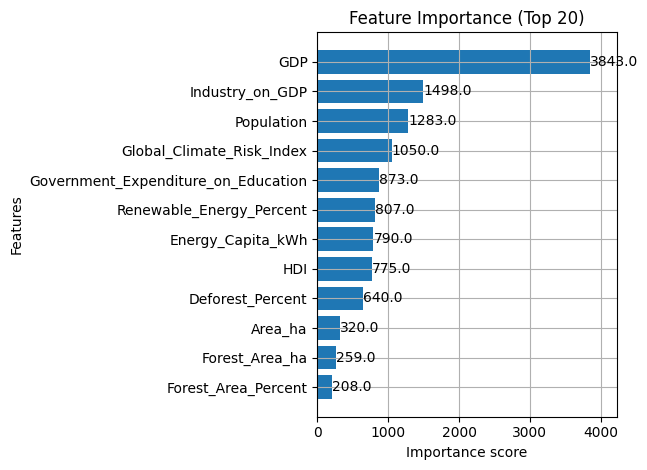

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
# 1. Tải dữ liệu
df = pd.read_csv(r"/home/anle/Analysis_CO2_Emission_Prj/Merge_Data/filled_dataset1.csv")

# 2. [MỚI] Lọc DataFrame để chỉ giữ các cột mong muốn
columns_to_keep = [
    'ISO_Code',
    'Year',
    'Co2_MtCO2',
    'GDP',
    'Population',
    'Industry_on_GDP',
    'HDI',
    'Government_Expenditure_on_Education',
    'Global_Climate_Risk_Index',
    'Area_ha',
    'Forest_Area_ha',
    'Forest_Area_Percent',
    'Deforest_Percent',
    'Energy_Capita_kWh',
    'Renewable_Energy_Percent'
]

# Ghi đè df cũ bằng df mới đã được lọc
df = df[columns_to_keep]


df.info()

# 3. Định nghĩa Feature (X) và Target (y)
# Target y
y = df['Co2_MtCO2']

# Features X
# [ĐÃ CẬP NHẬT] Giờ chúng ta chỉ cần drop cột target
# vì df chỉ còn các cột trong columns_to_keep
X = df.drop(columns=['Co2_MtCO2'])
    
# 4. Xử lý dữ liệu phân loại (Categorical Data)
# Chuyển 'Year' (float64) sang string để get_dummies
X['Year'] = X['Year'].astype(str)

# Áp dụng get_dummies cho 'ISO_Code' và 'Year'
X_processed = pd.get_dummies(X, columns=['ISO_Code', 'Year'], drop_first=True)

# 5. Chia dữ liệu thành tập Train và Test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Kích thước tập Train (đã xử lý): {X_train.shape}")
print(f"Kích thước tập Test (đã xử lý): {X_test.shape}")
print(f"Số lượng features sau khi get_dummies: {X_train.shape[1]}")

# 6. Khởi tạo và Huấn luyện Model
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    early_stopping_rounds=50,
    random_state=42,
)

print("\nBắt đầu huấn luyện mô hình XGBoost...")

# Huấn luyện mô hình
xgb_reg.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("Huấn luyện hoàn tất!")

# 7. Đánh giá Model
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("\n--- Kết quả Đánh giá Model ---")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

# 8. Trực quan hóa độ quan trọng của Feature
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_reg, max_num_features=12, height=0.8) # Hiển thị top 20
plt.title('Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

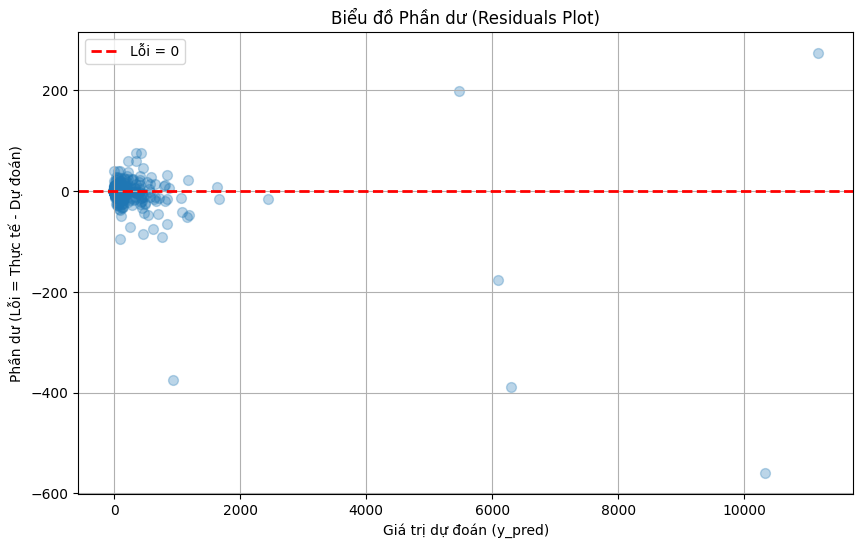

In [ ]:
# 1. Tính toán phần dư (lỗi)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
# Vẽ các điểm (dự đoán vs. lỗi)
plt.scatter(y_pred, residuals, alpha=0.3, s=50)

# Vẽ đường số 0, nơi lỗi = 0
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Lỗi = 0')

plt.xlabel('Giá trị dự đoán (y_pred)')
plt.ylabel('Phần dư (Lỗi = Thực tế - Dự đoán)')
plt.title('Biểu đồ Phần dư (Residuals Plot)')
plt.legend()
plt.grid(True)
plt.show()

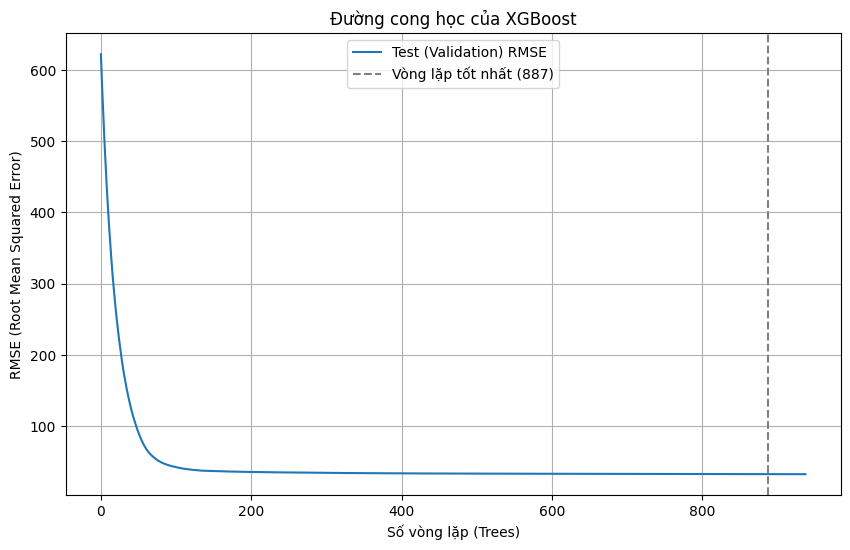

In [ ]:
# Lấy kết quả từ quá trình training
results = xgb_reg.evals_result()

plt.figure(figsize=(10, 6))
# 'validation_0' là tên mặc định cho eval_set đầu tiên bạn cung cấp
plt.plot(results['validation_0']['rmse'], label='Test (Validation) RMSE')

# Đánh dấu vòng lặp tốt nhất (nơi early stopping dừng lại)
plt.axvline(x=xgb_reg.best_iteration, color='gray', linestyle='--', 
            label=f'Vòng lặp tốt nhất ({xgb_reg.best_iteration})')

plt.xlabel('Số vòng lặp (Trees)')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('Đường cong học của XGBoost')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ISO_Code                             4180 non-null   object 
 1   Year                                 4180 non-null   float64
 2   Co2_MtCO2                            4180 non-null   float64
 3   GDP                                  4180 non-null   float64
 4   Population                           4180 non-null   float64
 5   Industry_on_GDP                      4180 non-null   float64
 6   HDI                                  4180 non-null   float64
 7   Government_Expenditure_on_Education  4180 non-null   float64
 8   Global_Climate_Risk_Index            4180 non-null   float64
 9   Area_ha                              4180 non-null   float64
 10  Forest_Area_ha                       4180 non-null   float64
 11  Forest_Area_Percent           

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("--- 1. Chuẩn bị dữ liệu (Áp dụng Log Transform) và chia Train/Test ---")

# Lấy danh sách quốc gia duy nhất
all_countries = df['ISO_Code'].unique()

# Xáo trộn danh sách
np.random.seed(42) # Đặt seed để có thể tái lặp kết quả
np.random.shuffle(all_countries)

# Chia 80/20
split_idx = int(len(all_countries) * 0.8)
train_countries = all_countries[:split_idx]
test_countries = all_countries[split_idx:]

# Tạo DataFrame
train_df = df[df['ISO_Code'].isin(train_countries)].copy()
test_df = df[df['ISO_Code'].isin(test_countries)].copy()

print(f"Tổng số quốc gia: {len(all_countries)}")
print(f"Số quốc gia trong Train set: {len(train_countries)}")
print(f"Số quốc gia trong Test set: {len(test_countries)}")
print(f"Số dòng Train: {len(train_df)}, Số dòng Test: {len(test_df)}")

# --- 2. Huấn luyện mô hình FE trên Train Set (với Y đã logarit) ---
print("\n--- 2. Huấn luyện mô hình FE trên Y_log ---")

# SỬ DỤNG LOGARIT: np.log1p(Y)
Y_train_log = np.log1p(train_df['Co2_MtCO2'])

# [ĐÃ SỬA] Loại cả cột Target (Co2_MtCO2) VÀ cột Entity (ISO_Code)
independent_vars = [col for col in df.columns if col not in ['Co2_MtCO2', 'ISO_Code']]

X_train_vars = train_df[independent_vars]
X_train_const = sm.add_constant(X_train_vars)

# Tạo biến giả CHỈ cho các quốc gia trong train set
train_dummies = pd.get_dummies(train_df['ISO_Code'], drop_first=True, dtype=int)
X_train_fe = pd.concat([X_train_const, train_dummies], axis=1)

model_fe_log = sm.OLS(Y_train_log, X_train_fe, missing='drop')
results_fe_log = model_fe_log.fit()
print("Huấn luyện mô hình FE (Log) thành công.")

# --- 3. Chuẩn bị dự đoán cho Test Set ---
print("\n--- 3. Chuẩn bị dự đoán cho Test Set (Log) ---")

# Lấy các hệ số beta (các biến ft_...)
fe_vars_used = [var for var in independent_vars if var in results_fe_log.params.index]
beta_coeffs = results_fe_log.params.filter(items=fe_vars_used)

# Tính alpha trung bình (mean fixed effect) từ train set
# LƯU Ý: alpha NÀY ĐANG Ở THANG ĐO LOGARIT
alpha_baseline = results_fe_log.params.get('const', 0)
dummy_vars_used = [var for var in train_dummies.columns if var in results_fe_log.params.index]
dummy_coeffs = results_fe_log.params.filter(items=dummy_vars_used)
all_alphas = [alpha_baseline] + (alpha_baseline + dummy_coeffs).tolist()
mean_alpha_log = np.mean(all_alphas)

print(f"Alpha trung bình (mean_alpha_log) từ train set: {mean_alpha_log:.4f}")

# --- 4. Thực hiện dự đoán trên Test Set ---
# Công thức: Y_pred_log = X_test * beta + mean_alpha_log

# Lấy Y_test gốc (chưa logarit) để đánh giá
Y_test_original = test_df['Co2_MtCO2']
X_test_vars = test_df[independent_vars]

# Đảm bảo các cột của X_test khớp với thứ tự của beta_coeffs
X_test_for_beta = X_test_vars[beta_coeffs.index]

# Tính phần X * beta
x_beta_part = X_test_for_beta.dot(beta_coeffs)

# Cộng alpha trung bình (trên thang đo log)
Y_pred_log = x_beta_part + mean_alpha_log

# BIẾN ĐỔI NGƯỢC: np.expm1(Y)
Y_DuDoan_original = np.expm1(Y_pred_log)

# Xử lý trường hợp dự đoán bị âm (rất hiếm, nhưng có thể)
Y_DuDoan_original[Y_DuDoan_original < 0] = 0

print("Dự đoán (Log) và biến đổi ngược thành công.")

# --- 5. Đánh giá sai số (trên thang đo GỐC) ---
print("\n--- 5. Đánh giá sai số (so sánh với Y gốc) ---")

mae = mean_absolute_error(Y_test_original, Y_DuDoan_original)
rmse = np.sqrt(mean_squared_error(Y_test_original, Y_DuDoan_original))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# --- 6. Hiển thị dự đoán ngẫu nhiên ---
print("\n--- 6. Hiển thị 5 dự đoán ngẫu nhiên từ Test Set (thang đo GỐC) ---")

results_df = pd.DataFrame({
    'ISO_Code': test_df['ISO_Code'],
    'Year': test_df['Year'],
    'Y_ThucTe': Y_test_original,
    'Y_DuDoan': Y_DuDoan_original
})
results_df['SaiSo'] = results_df['Y_ThucTe'] - results_df['Y_DuDoan']

print(results_df.sample(5, random_state=42))

# --- 7. Hiển thị 5 dự đoán có sai số lớn nhất ---
print("\n--- 7. Hiển thị 5 dự đoán có sai số lớn nhất ---")
results_df['SaiSoTuyetDoi'] = np.abs(results_df['SaiSo'])

print(results_df.nlargest(5, 'SaiSoTuyetDoi'))

--- 1. Chuẩn bị dữ liệu (Áp dụng Log Transform) và chia Train/Test ---
Tổng số quốc gia: 190
Số quốc gia trong Train set: 152
Số quốc gia trong Test set: 38
Số dòng Train: 3344, Số dòng Test: 836

--- 2. Huấn luyện mô hình FE trên Y_log ---
Huấn luyện mô hình FE (Log) thành công.

--- 3. Chuẩn bị dự đoán cho Test Set (Log) ---
Alpha trung bình (mean_alpha_log) từ train set: 8.4169
Dự đoán (Log) và biến đổi ngược thành công.

--- 5. Đánh giá sai số (so sánh với Y gốc) ---
Mean Absolute Error (MAE): 32.9597
Root Mean Squared Error (RMSE): 79.9598

--- 6. Hiển thị 5 dự đoán ngẫu nhiên từ Test Set (thang đo GỐC) ---
     ISO_Code    Year  Y_ThucTe   Y_DuDoan      SaiSo
3295      SEN  2018.0    11.330   4.145962   7.184038
4167      ZWE  2010.0     8.754   2.242283   6.511717
1632      HUN  2005.0    60.142  35.944347  24.197653
4145      ZMB  2010.0     3.120   1.426337   1.693663
1158      SLV  2015.0     6.668  12.400972  -5.732972

--- 7. Hiển thị 5 dự đoán có sai số lớn nhất ---
     I